# Computer Vision - Final Project

### Imports

In [17]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Flatten, Dense
import matplotlib.pyplot as plt

### Load train and test data

In [18]:
def load_data():
    
    # load train and test from Mnist dataSet
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    
    # normalize data
    x_train, x_test = x_train / 255.0, x_test / 255.0
    
    return x_train, y_train, x_test, y_test
    
x_train, y_train, x_test, y_test = load_data()

### Plot learning curve

In [61]:
def curve(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

### Create a sequential model with sigmoid

In [59]:
def create_sigmoid_model():
    """
    Creates simple neural network models for image classification.

    Returns:
    - model1 (Sequential): First model with 128 neurons, sigmoid activation, and 10 output classes
    - model3 (Sequential): Second model with 256, 128, 64 neurons in hidden layers, sigmoid activation,
                          and 10 output classes (softmax activation)
    """
    
    model1 = Sequential([
        # Flatten the input images
        Flatten(input_shape=(28, 28)),
        # Fully connected layer with 128 neurons and sigmoid activation
        Dense(128, activation='sigmoid'),
        # Output layer with 10 neurons (for 10 classes) and softmax activation
        Dense(10, activation='softmax')
    ])
    
    model3 = Sequential([
        # Flatten the input images
        Flatten(input_shape=(28, 28)),
        # Fully connected layer and sigmoid activation
        Dense(256, activation='sigmoid'),
        Dense(128, activation='sigmoid'),
        Dense(64, activation='sigmoid'),
        # Output layer with 10 neurons (for 10 classes) and softmax activation
        Dense(10, activation='softmax')
    ])
    
    return model1, model3

### Create a sequential model with relu

In [56]:
def create_relu_model(input_shape=(28, 28)):
    """
    Creates a simple neural network model for image classification.

    Args:
    - input_shape (tuple): Shape of the input images (default is (28, 28))

    Returns:
    - model (Sequential): Compiled neural network model
    """
    
    model = Sequential([
        # Flatten the input images
        Flatten(input_shape=input_shape),
        # Fully connected layers and relu activation
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        # Output layer with 10 neurons (for 10 classes) and softmax activation
        Dense(10, activation='softmax')
    ])
    
    return model

### Compile & train the model

In [32]:
def compileAndTrain_model(model, batch_size=32, epochs=10):
    """
    Compiles and trains a neural network model using given parameters.

    Args:
    - model (Sequential): Neural network model to be compiled and trained
    - batch_size (int): Size of mini-batches during training (default is 32)
    - epochs (int): Number of epochs for training (default is 10)

    Returns:
    - history (History): Training history containing loss and accuracy metrics
    """
    
     # Compile the model with Adam optimizer, sparse categorical crossentropy loss, and accuracy metric
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model on the training data, validate on the test data
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))
    
    return history

In [60]:
sigmoid_model1, sigmoid_model3 = create_sigmoid_model()
sigmoid_history1 = compileAndTrain_model(sigmoid_model1)
sigmoid_history3 = compileAndTrain_model(sigmoid_model3)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3952 - accuracy: 0.8974 - val_loss: 0.2226 - val_accuracy: 0.9372
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1938 - accuracy: 0.9438 - val_loss: 0.1637 - val_accuracy: 0.9506
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1416 - accuracy: 0.9592 - val_loss: 0.1296 - val_accuracy: 0.9603
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1110 - accuracy: 0.9684 - val_loss: 0.1114 - val_accuracy: 0.9671
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0890 - accuracy: 0.9743 - val_loss: 0.0968 - val_accuracy: 0.9701
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0731 - accuracy: 0.9797 - val_loss: 0.0894 - val_accuracy: 0.9721
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0605 - accuracy: 0.9830 - val_loss: 0.0823 - val_accuracy:

### plot the results for sigmoid activation function and one layer

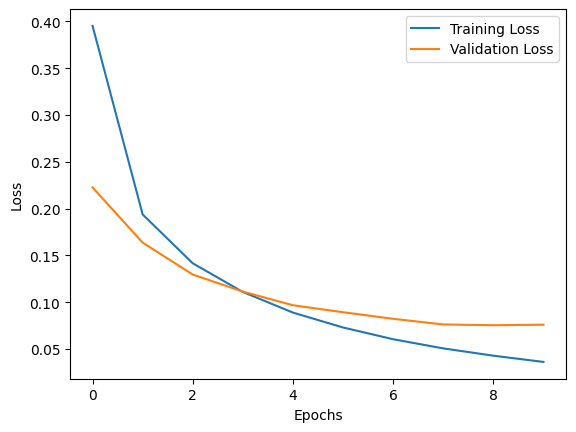

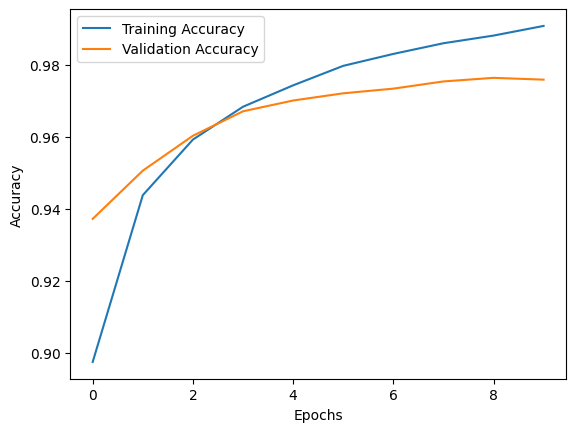

In [62]:
curve(sigmoid_history1)

### plot the results for sigmoid activation function and three layer

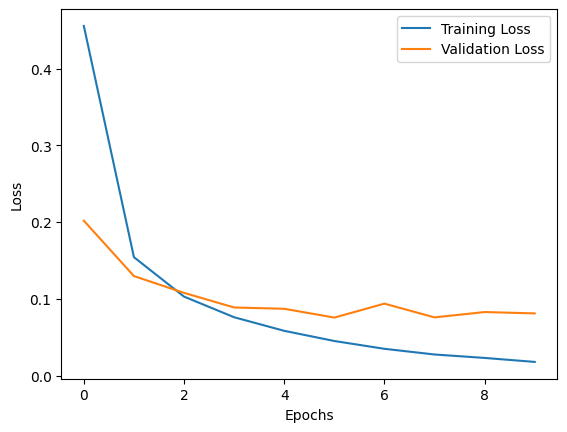

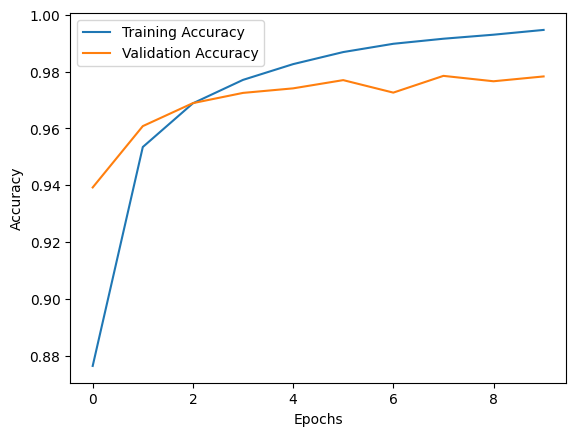

In [63]:
curve(sigmoid_history3)

In [57]:
relu_model = create_relu_model()
relu_history = compileAndTrain_model(relu_model)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2154 - accuracy: 0.9358 - val_loss: 0.1113 - val_accuracy: 0.9680
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0928 - accuracy: 0.9715 - val_loss: 0.1002 - val_accuracy: 0.9686
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0644 - accuracy: 0.9806 - val_loss: 0.0948 - val_accuracy: 0.9737
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0503 - accuracy: 0.9840 - val_loss: 0.0864 - val_accuracy: 0.9760
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0409 - accuracy: 0.9871 - val_loss: 0.0743 - val_accuracy: 0.9791
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0324 - accuracy: 0.9895 - val_loss: 0.0809 - val_accuracy: 0.9796
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0280 - accuracy: 0.9904 - val_loss: 0.0840 - val_accuracy:

### plot the results for relu activation function

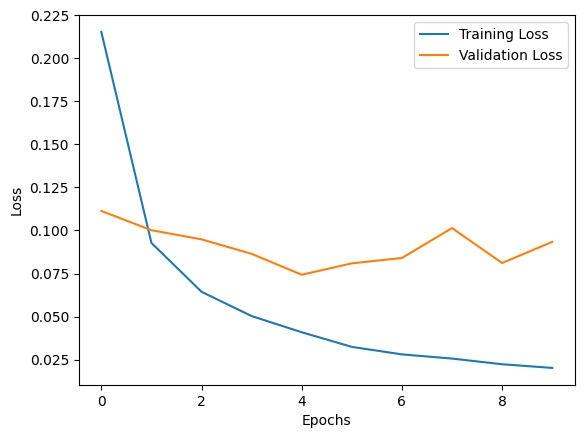

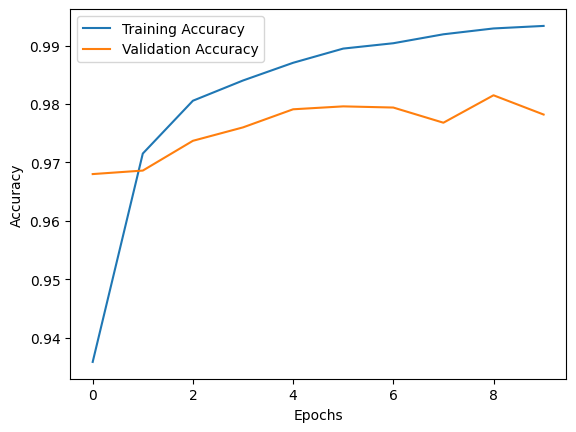

In [64]:
curve(relu_history)

## Report of this part:

If we increase the number of layers and neurons in each layer, the training speed will decreased but will be greater. In other hand the network may overFit because of the huge number of parameters.
images are 28*28 and the number of inputs for the network is 784. It is not too big so a 128 neurons layer is enough.
because if we increase the number of neurons and layers it only decrease the speed of training and in this case accuracy doesn't change too much. 

but we increase the number of layers for Relu activation function. It increase the speed of the train because now the number of parameters that should update is much more than just one layer. First we have a layer with 256 neurons. It extract basic features like edgeLets, colors, ... Then we have a 128 neurons layer that extract more complicated features like edges, combination of color, ... At last hidden layer we have 64 neurons that probably detects structures, ... At last we classify them to 10 class with a probability for each class. and the most probability will select.7
It may reduce the speed but the accuracy is higher because we extract features hierarchically.   

### Sigmoid VS  Relu:
<img src="https://i.postimg.cc/QdQ9RJZB/Sigmod-Vs-Relu.webp" alt="SigmoidVsRelu"></br>

    as you can see, the gradient of sigmoid in very positive or negative points is almost 0 and it doesn't allow for some parameters in network to update their weights and they may remain the previous weight. It reduce the speed of training. But in Relu the gradient of negative values is zero and for positive values is constant. It acts like a constant learning rate and so train with Relu is faster than sigmoid but the accuracy of sigmoid activation function is higher 

as you can see in diagrams, after 4 epochs of training the accuracy of validation data will be stable and the accuracy of training data will increase continuously(reverse for loss). It seems the network is going to overFit and we can stop the training after 4 epochs.